# Статистика

## Базовые понятия статистики

### Задание 1

Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Решение

In [282]:
# выбор 8 столбцов для изучения

horse_data = pd.read_csv('C:/Netology/practice_and_dz_stat/horse_data.csv', header=None, na_values='?', usecols=[1, 3, 4, 11, 12, 14, 16, 21], names=['age', 'rectal_temperature', 'pulse', 'peristalsis', 'abdominal_distension', 'nasogastric_reflux', 'rectal_examination', 'abdomcentesis_total_protein'])

horse_data.head(15)

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination,abdomcentesis_total_protein
0,1,38.5,66.0,4.0,4.0,NaN,3.0,NaN
1,1,39.2,88.0,4.0,2.0,NaN,4.0,2.0
2,1,38.3,40.0,3.0,1.0,NaN,1.0,NaN
3,9,39.1,164.0,4.0,4.0,2.0,3.0,5.3
4,1,37.3,104.0,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,3.0,2.0,1.0,3.0,NaN
6,1,37.9,48.0,3.0,3.0,1.0,3.0,NaN
7,1,NaN,60.0,4.0,2.0,1.0,3.0,NaN
8,1,NaN,80.0,4.0,4.0,1.0,3.0,NaN
9,9,38.3,90.0,3.0,1.0,1.0,3.0,2.2


In [283]:
# столбец Age является вторым в описании и имеет значения 1 = Adult horse и 2 = Young (< 6 months)
# в Python, нумерация начинается с 0, то есть столбец Age имеет порядковый номер 1
# при изучении содержимого столбца установлено, что в столбце содержатся значения 1 и 9, что не соответсвует значениям в описании
# ввиду чего, предположил, что наличие значения 9 является ошибкой и соответсвует значению 2
# ввиду чего проивел замену 9 на 2

horse_data['age'] = horse_data['age'].replace(9, 2)
horse_data.head()

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination,abdomcentesis_total_protein
0,1,38.5,66.0,4.0,4.0,NaN,3.0,NaN
1,1,39.2,88.0,4.0,2.0,NaN,4.0,2.0
2,1,38.3,40.0,3.0,1.0,NaN,1.0,NaN
3,2,39.1,164.0,4.0,4.0,2.0,3.0,5.3
4,1,37.3,104.0,NaN,NaN,NaN,NaN,NaN


In [284]:
horse_data.describe()

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination,abdomcentesis_total_protein
count,300.000000,240.000000,276.000000,256.000000,244.000000,194.000000,198.000000,102.000000
mean,1.080000,38.167917,71.913043,2.917969,2.266393,1.582474,2.757576,3.019608
std,0.271746,0.732289,28.630557,0.976744,1.065131,0.805359,1.251119,1.968567
min,1.000000,35.400000,30.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,1.000000,37.800000,48.000000,3.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,38.200000,64.000000,3.000000,2.000000,1.000000,3.000000,2.250000
75%,1.000000,38.500000,88.000000,4.000000,3.000000,2.000000,4.000000,3.900000
max,2.000000,40.800000,184.000000,4.000000,4.000000,3.000000,4.000000,10.100000


In [285]:
horse_data['age'].value_counts().head()

1    276
2     24
Name: age, dtype: int64

In [286]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
age_counts = {}
for x in horse_data.age.round():
    if x not in age_counts:
        age_counts[x] = 1
    else:
        age_counts[x] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxx = 0
mode_weight = None
for k, v in age_counts.items():
    if maxx < v:
        maxx = v
        mode_weight = k
print('Значение моды:', mode_weight, 'количество встречаемости:', maxx)

Значение моды: 1 количество встречаемости: 276


### Вывод:

Подавляющее большинство особей представленных в выборке, являются взрослыми.

In [289]:
# показатели ректальной температуры животных

print('Максимальное значение:', horse_data.rectal_temperature.max())
print('Минимальное значение', horse_data.rectal_temperature.min())
print('Среднее значение', round(horse_data.rectal_temperature.mean(), 2))
print('Значение моды', horse_data.rectal_temperature.round().mode()[0])
print('Значение медианны', horse_data.rectal_temperature.median())

Максимальное значение: 40.8
Минимальное значение 35.4
Среднее значение 38.17
Значение моды 38.0
Значение медианны 38.2


In [288]:
# показатели пульса животных

print('Максимальное значение:', horse_data.pulse.max())
print('Минимальное значение', horse_data.pulse.min())
print('Среднее значение', round(horse_data.pulse.mean(), 2))
print('Значение моды', horse_data.pulse.round().mode()[0])
print('Значение медианны', horse_data.pulse.median())

Максимальное значение: 184.0
Минимальное значение 30.0
Среднее значение 71.91
Значение моды 48.0
Значение медианны 64.0


In [290]:
# показатель перистальтика животных
print('Значение моды', horse_data.peristalsis.round().mode()[0])

Значение моды 3.0


In [291]:
# показатель назогастрального рефлюкса
print('Значение моды', horse_data.nasogastric_reflux.round().mode()[0])

Значение моды 1.0


In [292]:
# показатель ректального исследование
print('Значение моды', horse_data.rectal_examination.round().mode()[0])

Значение моды 4.0


In [293]:
# показатели общего белка брюшной полости

print('Максимальное значение:', horse_data.abdomcentesis_total_protein.max())
print('Минимальное значение', horse_data.abdomcentesis_total_protein.min())
print('Среднее значение', round(horse_data.abdomcentesis_total_protein.mean(), 2))
print('Значение моды', horse_data.abdomcentesis_total_protein.round().mode()[0])
print('Значение медианны', horse_data.abdomcentesis_total_protein.median())

Максимальное значение: 10.1
Минимальное значение 0.1
Среднее значение 3.02
Значение моды 2.0
Значение медианны 2.25


### Выводы

Большенство ислледуемых животных являются взрослые особи.
Показатели среднего значения и моды ректальной температуры незначительно отклонены от нормы 37.8, тем не менее являются в переделах допустимого.
Показатель среднего значения пульса, значительно выше нормы, показатель моды также превышает значение нормы 30-40, по показателю моды можем предположить, что на момент проведения исследования животные испытывали стресс и находились незначительном шоковом состоянии, тем не менее значительное отклонение среднего начения пульса от нормы говорит о наличии выброса в данных, либо присутвия в выборке больных животных испытывающих сильный болевой синдром, данные параметр требует дополнительного исследования.
Большинство особое имеют гипермотильность перистальтики, иначе говоря имеет чрезмерную активность, что говорит о склонности к заболеваниям ЖКТ и язвенным заболеваниям.
У большинства особей показатель назогастрального рефлюкса отсутствует, что говорит об отсутсвии проблем с прохождением жидкости в организме.
На основании моды ректального исследования, можем сделать вывод, что у большое число особей в исследуемой выборке страдают от непроходимости кала, что является основной причиной кишечных коликов.
Показатели белка брюшной полости, подтверждают то, что ряд особей испытавают кишечные колики, высокие значения данного показателя у особей говорит о том, что заболевание носит острый характер.


### Задание 2
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Решение

In [295]:
# исключение из выборки выбросов путем межквартильного размаха

# найдем выбросы через межквартильный размах по показателю ректальной температуры

q1 = horse_data.rectal_temperature.quantile(0.25)
q3 = horse_data.rectal_temperature.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_1 = horse_data[horse_data.rectal_temperature.between(lower_bound, upper_bound, inclusive=True)].sort_values('age')
remove_outliers_1

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination,abdomcentesis_total_protein
0,1,38.5,66.0,4.0,4.0,NaN,3.0,NaN
189,1,38.3,60.0,1.0,1.0,2.0,1.0,3.0
190,1,37.1,40.0,3.0,1.0,1.0,3.0,NaN
192,1,38.2,48.0,3.0,3.0,2.0,4.0,2.0
194,1,37.9,88.0,2.0,1.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...
255,2,38.8,184.0,1.0,3.0,NaN,2.0,NaN
252,2,38.8,124.0,3.0,4.0,1.0,4.0,NaN
39,2,39.2,146.0,NaN,NaN,NaN,NaN,NaN
135,2,38.1,136.0,1.0,3.0,2.0,2.0,2.9


In [297]:

# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', remove_outliers_1.rectal_temperature.max())
print('Минимальное значение температуры животного', remove_outliers_1.rectal_temperature.min())
print('Среднее значение температуры животного', round(remove_outliers_1.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', remove_outliers_1.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', remove_outliers_1.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', remove_outliers_1.pulse.max())
print('Минимальное значение пульса животного', remove_outliers_1.pulse.min())
print('Среднее значение пульса животного', round(remove_outliers_1.pulse.mean(), 2))
print('Значение моды пульса животного', remove_outliers_1.pulse.round().mode()[0])
print('Значение медианны пульса животного', remove_outliers_1.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', remove_outliers_1.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', remove_outliers_1.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', remove_outliers_1.rectal_examination.round().mode()[0])

# показатели общего белка брюшной полости

print('Максимальное значение белка брюшной полости животных:', remove_outliers_1.abdomcentesis_total_protein.max())
print('Минимальное значение белка брюшной полости животных', remove_outliers_1.abdomcentesis_total_protein.min())
print('Среднее значение белка брюшной полости животных', round(remove_outliers_1.abdomcentesis_total_protein.mean(), 2))
print('Значение моды белка брюшной полости животных', remove_outliers_1.abdomcentesis_total_protein.round().mode()[0])
print('Значение медианны белка брюшной полости животных', round(remove_outliers_1.abdomcentesis_total_protein.median(), 2))

Максимальное значение температуры животного: 39.5
Минимальное значение температуры животного 36.8
Среднее значение температуры животного 38.17
Значение моды температуры животного 38.0
Значение медианны температуры животного 38.2
Максимальное значение пульса животного: 184.0
Минимальное значение пульса животного 30.0
Среднее значение пульса животного 69.04
Значение моды пульса животного 48.0
Значение медианны пульса животного 60.0
Значение моды перистальтики животных животных 3.0
Значение моды назогастрального рефлюкса животных 1.0
Значение моды ректального исследования животных 1.0
Максимальное значение белка брюшной полости животных: 10.1
Минимальное значение белка брюшной полости животных 0.1
Среднее значение белка брюшной полости животных 3.09
Значение моды белка брюшной полости животных 2.0
Значение медианны белка брюшной полости животных 2.15


In [298]:
#найдем выбросы через межквартльный размах по показателю пульса

q1 = horse_data.pulse.quantile(0.25)
q3 = horse_data.pulse.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_2 = horse_data[horse_data.rectal_temperature.between(lower_bound, upper_bound, inclusive=True)].sort_values('age')
remove_outliers_2

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination,abdomcentesis_total_protein
0,1,38.5,66.0,4.0,4.0,NaN,3.0,NaN
189,1,38.3,60.0,1.0,1.0,2.0,1.0,3.0
190,1,37.1,40.0,3.0,1.0,1.0,3.0,NaN
192,1,38.2,48.0,3.0,3.0,2.0,4.0,2.0
194,1,37.9,88.0,2.0,1.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...
39,2,39.2,146.0,NaN,NaN,NaN,NaN,NaN
255,2,38.8,184.0,1.0,3.0,NaN,2.0,NaN
252,2,38.8,124.0,3.0,4.0,1.0,4.0,NaN
135,2,38.1,136.0,1.0,3.0,2.0,2.0,2.9


In [299]:
# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', remove_outliers_2.rectal_temperature.max())
print('Минимальное значение температуры животного', remove_outliers_2.rectal_temperature.min())
print('Среднее значение температуры животного', round(remove_outliers_2.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', remove_outliers_2.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', remove_outliers_2.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', remove_outliers_2.pulse.max())
print('Минимальное значение пульса животного', remove_outliers_2.pulse.min())
print('Среднее значение пульса животного', round(remove_outliers_2.pulse.mean(), 2))
print('Значение моды пульса животного', remove_outliers_2.pulse.round().mode()[0])
print('Значение медианны пульса животного', remove_outliers_2.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', remove_outliers_2.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', remove_outliers_2.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', remove_outliers_2.rectal_examination.round().mode()[0])

# показатели общего белка брюшной полости

print('Максимальное значение белка брюшной полости животных:', remove_outliers_2.abdomcentesis_total_protein.max())
print('Минимальное значение белка брюшной полости животных', remove_outliers_2.abdomcentesis_total_protein.min())
print('Среднее значение белка брюшной полости животных', round(remove_outliers_2.abdomcentesis_total_protein.mean(), 2))
print('Значение моды белка брюшной полости животных', remove_outliers_2.abdomcentesis_total_protein.round().mode()[0])
print('Значение медианны белка брюшной полости животных', round(remove_outliers_2.abdomcentesis_total_protein.median(), 2))

Максимальное значение температуры животного: 40.8
Минимальное значение температуры животного 35.4
Среднее значение температуры животного 38.17
Значение моды температуры животного 38.0
Значение медианны температуры животного 38.2
Максимальное значение пульса животного: 184.0
Минимальное значение пульса животного 30.0
Среднее значение пульса животного 70.24
Значение моды пульса животного 48.0
Значение медианны пульса животного 60.0
Значение моды перистальтики животных животных 3.0
Значение моды назогастрального рефлюкса животных 1.0
Значение моды ректального исследования животных 4.0
Максимальное значение белка брюшной полости животных: 10.1
Минимальное значение белка брюшной полости животных 0.1
Среднее значение белка брюшной полости животных 3.09
Значение моды белка брюшной полости животных 2.0
Значение медианны белка брюшной полости животных 2.3


In [300]:
#найдем выбросы через межквартльный размах по показателю белка брюшной полости

q1 = horse_data.abdomcentesis_total_protein.quantile(0.25)
q3 = horse_data.abdomcentesis_total_protein.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_3 = horse_data[horse_data.abdomcentesis_total_protein.between(lower_bound, upper_bound, inclusive=True)].sort_values('age')
remove_outliers_3

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination,abdomcentesis_total_protein
1,1,39.2,88.0,4.0,2.0,NaN,4.0,2.0
209,1,37.5,44.0,1.0,2.0,NaN,3.0,1.0
204,1,39.2,NaN,4.0,2.0,NaN,NaN,3.0
202,1,37.5,48.0,NaN,NaN,1.0,NaN,2.0
201,1,38.5,86.0,4.0,3.0,1.0,3.0,3.4
...,...,...,...,...,...,...,...,...
16,2,NaN,128.0,4.0,3.0,NaN,4.0,4.7
135,2,38.1,136.0,1.0,3.0,2.0,2.0,2.9
9,2,38.3,90.0,3.0,1.0,1.0,3.0,2.2
3,2,39.1,164.0,4.0,4.0,2.0,3.0,5.3


### Разница показателей выборки и показателей без учета значений выбросов по ректальной температуре животных

In [302]:
# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', horse_data.rectal_temperature.max() - remove_outliers_1.rectal_temperature.max())
print('Минимальное значение температуры животного', horse_data.rectal_temperature.min() - remove_outliers_1.rectal_temperature.min())
print('Среднее значение температуры животного', round(horse_data.rectal_temperature.mean() - remove_outliers_1.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', horse_data.rectal_temperature.round().mode()[0] - remove_outliers_1.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', horse_data.rectal_temperature.median() - remove_outliers_1.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', horse_data.pulse.max() - remove_outliers_1.pulse.max())
print('Минимальное значение пульса животного', horse_data.pulse.min() - remove_outliers_1.pulse.min())
print('Среднее значение пульса животного', round(horse_data.pulse.mean() - remove_outliers_1.pulse.mean(), 2))
print('Значение моды пульса животного', horse_data.pulse.round().mode()[0] - remove_outliers_1.pulse.round().mode()[0])
print('Значение медианны пульса животного', horse_data.pulse.median() - remove_outliers_1.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', horse_data.peristalsis.round().mode()[0] - remove_outliers_1.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', horse_data.nasogastric_reflux.round().mode()[0] - remove_outliers_1.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', horse_data.rectal_examination.round().mode()[0] - remove_outliers_1.rectal_examination.round().mode()[0])

# показатели общего белка брюшной полости

print('Максимальное значение белка брюшной полости животных:', horse_data.abdomcentesis_total_protein.max() - remove_outliers_1.abdomcentesis_total_protein.max())
print('Минимальное значение белка брюшной полости животных', horse_data.abdomcentesis_total_protein.min() - remove_outliers_1.abdomcentesis_total_protein.min())
print('Среднее значение белка брюшной полости животных', round(horse_data.abdomcentesis_total_protein.mean() - remove_outliers_1.abdomcentesis_total_protein.mean(), 2))
print('Значение моды белка брюшной полости животных', horse_data.abdomcentesis_total_protein.round().mode()[0] - remove_outliers_1.abdomcentesis_total_protein.round().mode()[0])
print('Значение медианны белка брюшной полости животных', round(horse_data.abdomcentesis_total_protein.median() - remove_outliers_1.abdomcentesis_total_protein.median(), 2))


Максимальное значение температуры животного: 1.2999999999999972
Минимальное значение температуры животного -1.3999999999999986
Среднее значение температуры животного -0.0
Значение моды температуры животного 0.0
Значение медианны температуры животного 0.0
Максимальное значение пульса животного: 0.0
Минимальное значение пульса животного 0.0
Среднее значение пульса животного 2.87
Значение моды пульса животного 0.0
Значение медианны пульса животного 4.0
Значение моды перистальтики животных животных 0.0
Значение моды назогастрального рефлюкса животных 0.0
Значение моды ректального исследования животных 3.0
Максимальное значение белка брюшной полости животных: 0.0
Минимальное значение белка брюшной полости животных 0.0
Среднее значение белка брюшной полости животных -0.07
Значение моды белка брюшной полости животных 0.0
Значение медианны белка брюшной полости животных 0.1


### Разница показателей выборки и показателей без учета значений выбросов по пульсу животных

In [303]:
# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', horse_data.rectal_temperature.max() - remove_outliers_2.rectal_temperature.max())
print('Минимальное значение температуры животного', horse_data.rectal_temperature.min() - remove_outliers_2.rectal_temperature.min())
print('Среднее значение температуры животного', round(horse_data.rectal_temperature.mean() - remove_outliers_2.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', horse_data.rectal_temperature.round().mode()[0] - remove_outliers_2.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', horse_data.rectal_temperature.median() - remove_outliers_2.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', horse_data.pulse.max() - remove_outliers_2.pulse.max())
print('Минимальное значение пульса животного', horse_data.pulse.min() - remove_outliers_2.pulse.min())
print('Среднее значение пульса животного', round(horse_data.pulse.mean() - remove_outliers_2.pulse.mean(), 2))
print('Значение моды пульса животного', horse_data.pulse.round().mode()[0] - remove_outliers_2.pulse.round().mode()[0])
print('Значение медианны пульса животного', horse_data.pulse.median() - remove_outliers_2.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', horse_data.peristalsis.round().mode()[0] - remove_outliers_2.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', horse_data.nasogastric_reflux.round().mode()[0] - remove_outliers_2.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', horse_data.rectal_examination.round().mode()[0] - remove_outliers_2.rectal_examination.round().mode()[0])

# показатели общего белка брюшной полости

print('Максимальное значение белка брюшной полости животных:', horse_data.abdomcentesis_total_protein.max() - remove_outliers_2.abdomcentesis_total_protein.max())
print('Минимальное значение белка брюшной полости животных', horse_data.abdomcentesis_total_protein.min() - remove_outliers_2.abdomcentesis_total_protein.min())
print('Среднее значение белка брюшной полости животных', round(horse_data.abdomcentesis_total_protein.mean() - remove_outliers_2.abdomcentesis_total_protein.mean(), 2))
print('Значение моды белка брюшной полости животных', horse_data.abdomcentesis_total_protein.round().mode()[0] - remove_outliers_2.abdomcentesis_total_protein.round().mode()[0])
print('Значение медианны белка брюшной полости животных', round(horse_data.abdomcentesis_total_protein.median() - remove_outliers_2.abdomcentesis_total_protein.median(), 2))



Максимальное значение температуры животного: 0.0
Минимальное значение температуры животного 0.0
Среднее значение температуры животного 0.0
Значение моды температуры животного 0.0
Значение медианны температуры животного 0.0
Максимальное значение пульса животного: 0.0
Минимальное значение пульса животного 0.0
Среднее значение пульса животного 1.68
Значение моды пульса животного 0.0
Значение медианны пульса животного 4.0
Значение моды перистальтики животных животных 0.0
Значение моды назогастрального рефлюкса животных 0.0
Значение моды ректального исследования животных 0.0
Максимальное значение белка брюшной полости животных: 0.0
Минимальное значение белка брюшной полости животных 0.0
Среднее значение белка брюшной полости животных -0.07
Значение моды белка брюшной полости животных 0.0
Значение медианны белка брюшной полости животных -0.05


### Разница показателей выборки и показателей без учета значений выбросов по показателю белка брюшной полости

In [304]:
# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', horse_data.rectal_temperature.max() - remove_outliers_3.rectal_temperature.max())
print('Минимальное значение температуры животного', horse_data.rectal_temperature.min() - remove_outliers_3.rectal_temperature.min())
print('Среднее значение температуры животного', round(horse_data.rectal_temperature.mean() - remove_outliers_3.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', horse_data.rectal_temperature.round().mode()[0] - remove_outliers_3.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', horse_data.rectal_temperature.median() - remove_outliers_3.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', horse_data.pulse.max() - remove_outliers_3.pulse.max())
print('Минимальное значение пульса животного', horse_data.pulse.min() - remove_outliers_3.pulse.min())
print('Среднее значение пульса животного', round(horse_data.pulse.mean() - remove_outliers_3.pulse.mean(), 2))
print('Значение моды пульса животного', horse_data.pulse.round().mode()[0] - remove_outliers_3.pulse.round().mode()[0])
print('Значение медианны пульса животного', horse_data.pulse.median() - remove_outliers_3.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', horse_data.peristalsis.round().mode()[0] - remove_outliers_3.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', horse_data.nasogastric_reflux.round().mode()[0] - remove_outliers_3.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', horse_data.rectal_examination.round().mode()[0] - remove_outliers_3.rectal_examination.round().mode()[0])

# показатели общего белка брюшной полости

print('Максимальное значение белка брюшной полости животных:', horse_data.abdomcentesis_total_protein.max() - remove_outliers_3.abdomcentesis_total_protein.max())
print('Минимальное значение белка брюшной полости животных', horse_data.abdomcentesis_total_protein.min() - remove_outliers_3.abdomcentesis_total_protein.min())
print('Среднее значение белка брюшной полости животных', round(horse_data.abdomcentesis_total_protein.mean() - remove_outliers_3.abdomcentesis_total_protein.mean(), 2))
print('Значение моды белка брюшной полости животных', horse_data.abdomcentesis_total_protein.round().mode()[0] - remove_outliers_3.abdomcentesis_total_protein.round().mode()[0])
print('Значение медианны белка брюшной полости животных', round(horse_data.abdomcentesis_total_protein.median() - remove_outliers_3.abdomcentesis_total_protein.median(), 2))


Максимальное значение температуры животного: 0.5
Минимальное значение температуры животного 0.0
Среднее значение температуры животного -0.01
Значение моды температуры животного 0.0
Значение медианны температуры животного 0.0
Максимальное значение пульса животного: 20.0
Минимальное значение пульса животного -6.0
Среднее значение пульса животного -6.32
Значение моды пульса животного -4.0
Значение медианны пульса животного -8.0
Значение моды перистальтики животных животных 0.0
Значение моды назогастрального рефлюкса животных 0.0
Значение моды ректального исследования животных 0.0
Максимальное значение белка брюшной полости животных: 3.5
Минимальное значение белка брюшной полости животных 0.0
Среднее значение белка брюшной полости животных 0.37
Значение моды белка брюшной полости животных 0.0
Значение медианны белка брюшной полости животных 0.25


### Выводы:

Наличие выбросов в показателях ректальной температуры и пульса животных существенно не влияют на результаты исследований.
Разница в показтелях замечена в ректальной температуре животных, пульса животных и показателе белка брюшной полости.

Одной из веротных причин наличие данных значительно превышающих (отклоняющих) от нормы, является то, что в исследуемой выборке животных имеются особи заболевание, которых протекает в острой форме, которая в свою очередь характеризуется высоким показателем пульса, ректальной температуры и белка брюшной полости 

### Задание 3

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

### Решение

In [305]:
for col in horse_data.columns:
    pct_missing = horse_data[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

age - 0.0%
rectal_temperature - 20.0%
pulse - 8.0%
peristalsis - 14.7%
abdominal_distension - 18.7%
nasogastric_reflux - 35.3%
rectal_examination - 34.0%
abdomcentesis_total_protein - 66.0%


In [306]:
# у нас очень много пропусков в abdomcentesis_total_protein . Нам эта информация точно нунжа?
# данный показатель является признаком течения кишечных коликов у животных, вывод о чем можно сделать на основании других данных

horse_data.drop(['abdomcentesis_total_protein'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   300 non-null    int64  
 1   rectal_temperature    240 non-null    float64
 2   pulse                 276 non-null    float64
 3   peristalsis           256 non-null    float64
 4   abdominal_distension  244 non-null    float64
 5   nasogastric_reflux    194 non-null    float64
 6   rectal_examination    198 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.5 KB


# Обоснование:

Исходный набор данных содержит физико-биологические показатели лошадей, испытывающих кишечные колики,
То есть набор данных течения болезни в рамках одной популяции, вида, а именно течение кишечных коликов у лошадей, заболевание которое своейственно данному в виду при неправленом уходе и содержании, питании, интенсивном тренинге и высокой физической нагрузки.

Поскольку мы рассматриваем данные одного представителя рода семейства лашадиных отряда непарнокопытных, то физико-биологические параметры здоровых особей, похожи или носят незначительные различия, обусловленные породой и локалом обитания.

Аналогично течение болезни в рамках представителей одного вида интендично, различиев в характере заболевания: легкий, средний, тяжелый, о чем могут свидетельствовать отклонения от нормы в большую сторону физико-биологические показатели особи популяции.

Ввиду вышеизложенного:
- Пропуски числовых столбцо заменим медианным значением;
- Пропуски категориальных столбцов заменим значением моды в рамках данного столбца, опираясь на то, что одни и теже показатели течения болезни схожи у особей одного вида.

In [307]:
result_horse_data = horse_data.drop(['abdomcentesis_total_protein'], axis=1)
result_horse_data

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination
0,1,38.5,66.0,4.0,4.0,NaN,3.0
1,1,39.2,88.0,4.0,2.0,NaN,4.0
2,1,38.3,40.0,3.0,1.0,NaN,1.0
3,2,39.1,164.0,4.0,4.0,2.0,3.0
4,1,37.3,104.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,1,NaN,120.0,4.0,NaN,NaN,NaN
296,1,37.2,72.0,3.0,3.0,1.0,4.0
297,1,37.5,72.0,4.0,3.0,1.0,3.0
298,1,36.5,100.0,3.0,3.0,1.0,4.0


In [308]:
result_horse_data.rectal_temperature.fillna(result_horse_data.rectal_temperature.median(), inplace=True)
result_horse_data.pulse.fillna(result_horse_data.pulse.median(), inplace=True)
result_horse_data.peristalsis.fillna(result_horse_data.peristalsis.mode()[0], inplace=True)
result_horse_data.abdominal_distension.fillna(result_horse_data.abdominal_distension.mode()[0], inplace=True)
result_horse_data.nasogastric_reflux.fillna(result_horse_data.nasogastric_reflux.mode()[0], inplace=True)
result_horse_data.rectal_examination.fillna(result_horse_data.rectal_examination.mode()[0], inplace=True)

result_horse_data

,age,rectal_temperature,pulse,peristalsis,abdominal_distension,nasogastric_reflux,rectal_examination
0,1,38.5,66.0,4.0,4.0,1.0,3.0
1,1,39.2,88.0,4.0,2.0,1.0,4.0
2,1,38.3,40.0,3.0,1.0,1.0,1.0
3,2,39.1,164.0,4.0,4.0,2.0,3.0
4,1,37.3,104.0,3.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...
295,1,38.2,120.0,4.0,1.0,1.0,4.0
296,1,37.2,72.0,3.0,3.0,1.0,4.0
297,1,37.5,72.0,4.0,3.0,1.0,3.0
298,1,36.5,100.0,3.0,3.0,1.0,4.0


In [309]:
# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', result_horse_data.rectal_temperature.max())
print('Минимальное значение температуры животного', result_horse_data.rectal_temperature.min())
print('Среднее значение температуры животного', round(result_horse_data.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', result_horse_data.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', result_horse_data.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', result_horse_data.pulse.max())
print('Минимальное значение пульса животного', result_horse_data.pulse.min())
print('Среднее значение пульса животного', round(result_horse_data.pulse.mean(), 2))
print('Значение моды пульса животного', result_horse_data.pulse.round().mode()[0])
print('Значение медианны пульса животного', result_horse_data.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', result_horse_data.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', result_horse_data.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', result_horse_data.rectal_examination.round().mode()[0])


Максимальное значение температуры животного: 40.8
Минимальное значение температуры животного 35.4
Среднее значение температуры животного 38.17
Значение моды температуры животного 38.0
Значение медианны температуры животного 38.2
Максимальное значение пульса животного: 184.0
Минимальное значение пульса животного 30.0
Среднее значение пульса животного 71.28
Значение моды пульса животного 64.0
Значение медианны пульса животного 64.0
Значение моды перистальтики животных животных 3.0
Значение моды назогастрального рефлюкса животных 1.0
Значение моды ректального исследования животных 4.0


### Разница показателей исходной выборки и показателей выборки с заполненными пропусками

In [310]:
# показатели ректальной температуры животных

print('Максимальное значение температуры животного:', result_horse_data.rectal_temperature.max() - horse_data.rectal_temperature.max())
print('Минимальное значение температуры животного', result_horse_data.rectal_temperature.min() - horse_data.rectal_temperature.min())
print('Среднее значение температуры животного', round(result_horse_data.rectal_temperature.mean() - horse_data.rectal_temperature.mean(), 2))
print('Значение моды температуры животного', result_horse_data.rectal_temperature.round().mode()[0] - horse_data.rectal_temperature.round().mode()[0])
print('Значение медианны температуры животного', result_horse_data.rectal_temperature.median() - horse_data.rectal_temperature.median())

# показатели пульса животных

print('Максимальное значение пульса животного:', result_horse_data.pulse.max() - horse_data.pulse.max())
print('Минимальное значение пульса животного', result_horse_data.pulse.min() - horse_data.pulse.min())
print('Среднее значение пульса животного', round(result_horse_data.pulse.mean() - horse_data.pulse.mean(), 2))
print('Значение моды пульса животного', result_horse_data.pulse.round().mode()[0] - horse_data.pulse.round().mode()[0])
print('Значение медианны пульса животного', result_horse_data.pulse.median() - horse_data.pulse.median())

# показатель перистальтика животных
print('Значение моды перистальтики животных животных', result_horse_data.peristalsis.round().mode()[0] - horse_data.peristalsis.round().mode()[0])

# показатель назогастрального рефлюкса
print('Значение моды назогастрального рефлюкса животных', result_horse_data.nasogastric_reflux.round().mode()[0] - horse_data.nasogastric_reflux.round().mode()[0])

# показатель ректального исследование
print('Значение моды ректального исследования животных', result_horse_data.rectal_examination.round().mode()[0] - horse_data.rectal_examination.round().mode()[0])


Максимальное значение температуры животного: 0.0
Минимальное значение температуры животного 0.0
Среднее значение температуры животного 0.01
Значение моды температуры животного 0.0
Значение медианны температуры животного 0.0
Максимальное значение пульса животного: 0.0
Минимальное значение пульса животного 0.0
Среднее значение пульса животного -0.63
Значение моды пульса животного 16.0
Значение медианны пульса животного 0.0
Значение моды перистальтики животных животных 0.0
Значение моды назогастрального рефлюкса животных 0.0
Значение моды ректального исследования животных 0.0


### Вывод
Сильных отклонений не выявлены,
Текущие отклонения носят естественный характер

## Случайные события. Случайные величины

### Задание 4
Смоделировать игру против лотерейного автомата
типа "777". Игрок платит 1 руб., после чего выпадает
случайное целое число, равномерно распределенное
от 0 до 999. При некоторых значениях числа игрок
получает выигрыш.

● Выгодна ли игра игроку?
● Сколько в среднем приобретает или теряет игрок за одну игру?
● Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования

### Решение

In [5]:
import numpy as np

In [312]:
money_total = 1000000   # Количество попыток, оно же сумма ставок 
win = 0    # Количество успехов
loss = 0   # Количество проигрышей

#money_total = int(input('Введите сумму оплаты лотереи'))

winning_amount = 0
for i in range(money_total):
    random_score = np.random.randint(0, 1000)    # Случайное количество очков от 1 до 999
    if random_score == 777:
        win += 1
        winning_amount += 200
    elif random_score == 999:
        win += 1
        winning_amount += 100
    elif random_score == 555:
        win += 1
        winning_amount += 50
    elif random_score == 333:
        win += 1
        winning_amount += 15
    elif random_score == 111:
        win += 1
        winning_amount += 10
    elif random_score%100 == 77 and random_score != 777:
        win += 1
        winning_amount += 5
    elif random_score%10 == 7:
        win += 1
        winning_amount += 3
    elif random_score%100 == 0:
        win += 1
        winning_amount += 2
    elif random_score%10 == 0:
        win += 1
        winning_amount += 1
    else:
        loss += 1
if winning_amount > 0:
    print('Ваш выигрыш составил:', winning_amount, 'руб.')
else:
    print('Вы проиграли:(')

p = 9 / 1000                                  # Теоретическая вероятность
p_monte_carlo = win / money_total             # Вероятность из моделирования
winning_model = winning_amount / money_total  # средний выигрыш за одну игру

print(f'Количество побед: {win}. Проигрыш: {loss} руб.. Ставка: {money_total} руб.')
print(f'Теоретическая вероятность: {p}. Вероятность из моделирования: {p_monte_carlo}. Средний выигрыш за одну игру: {round(100*winning_model)} копеек.') 
print(f'Средняя потеря за одну игру: {round(100*(1-winning_model))} копеек')

Ваш выигрыш составил: 787814 руб.
Количество побед: 203894. Проигрыш: 796106 руб.. Ставка: 1000000 руб.
Теоретическая вероятность: 0.009. Вероятность из моделирования: 0.203894. Средний выигрыш за одну игру: 79 копеек.
Средняя потеря за одну игру: 21 копеек


In [313]:
def shoot():
    return np.random.randint(0, 1000)

(array([ 97.,  88.,  94.,  96., 108., 107.,  94., 133.,  89.,  94.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

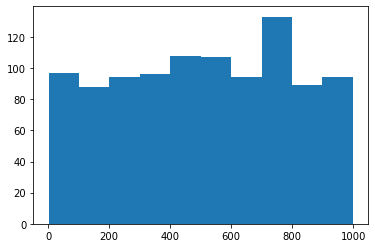

In [314]:
# Построим  график выпадения чисел от 0 до 999:

from matplotlib import pyplot as plt
%matplotlib inline
y = [ shoot() for v in range(1000) ]
plt.hist(y)

### Выводы:
 Вопрос 1: Выгодна ли игроку игра?
 Ответ: Игра игроку не выгодна.

Вопрос 2: Сколько в среднем приобретает или теряет игрок за одну игру?
Ответ: Игрок за одну игру теряет сумму платы за игру, то есть 1 рубль потери за каждую проигрышную игру. Игрок ничего не приобретает за одну игру так как для одной игры вероятность выигрыша сильно мала.

In [315]:
#чтобы рассчитать средний проигрыш теоретически, надо определить вероятность каждого выигрышного исхода 
#и воспользоваться формулой P1*X1 + P2*X2 + ... + Pn*Xn:

res = 0.001*(200 + 100 + 50 + 15 + 10) + (9/1000)*5 + (10/1000)*2 + ((99-9)/1000)*3 + ((100-10)/1000)*1
res

0.7999999999999999

## Корреляция и корреляционный анализ

### Задание 5
Необходимо ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

### Решение

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
data =  pd.read_csv('C:/Netology/water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [319]:
data['mortality']

0     1247
1     1668
2     1466
3     1800
4     1609
      ... 
56    1527
57    1627
58    1486
59    1485
60    1378
Name: mortality, Length: 61, dtype: int64

In [320]:
data['hardness']

0     105
1      17
2       5
3      14
4      18
     ... 
56     60
57     53
58    122
59     81
60     71
Name: hardness, Length: 61, dtype: int64

### Корреляция

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

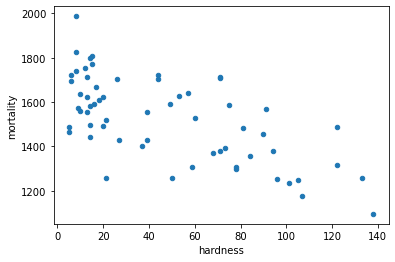

In [321]:
data.plot(kind='scatter', x='hardness', y='mortality')

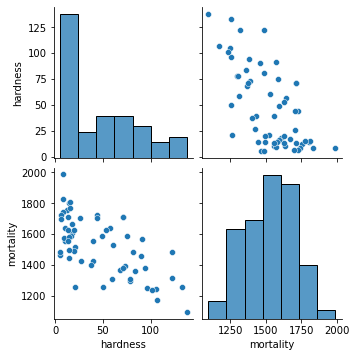

In [322]:
sns.pairplot(data[['hardness','mortality']])

In [323]:
# коэффициент корреляции Пирсона

data[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [324]:
# коэффициент корреляции Спирмена

data[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [325]:
# коэффициент корреляции Кенделла

data[['hardness','mortality']].corr(method='kendall')


,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


<AxesSubplot:>

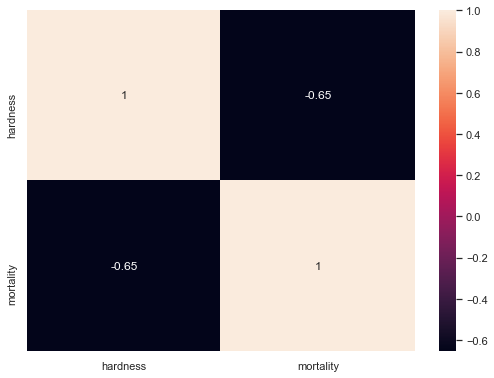

In [326]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data[['hardness','mortality']].corr(), annot=True)

### Выводы:
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена умеренно сильная по методу Спирмена.
3. Гипотеза: чем выше сметрность, тем ниже жесткость воды, и наоборот.

### Регрессия

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [328]:
X = data[['hardness']]
y = data['mortality']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [330]:
X_train.shape

(42, 1)

In [331]:
X_test.shape

(19, 1)

In [332]:
y_train.shape

(42,)

In [333]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [334]:
# коэффициент линейной регрессии

model.coef_

array([-3.13167087])

In [335]:
model.intercept_

1668.9722977277095

In [336]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [337]:
# значение коэффициента детерминации

model.score(X_test, y_test) 

0.5046490611017092

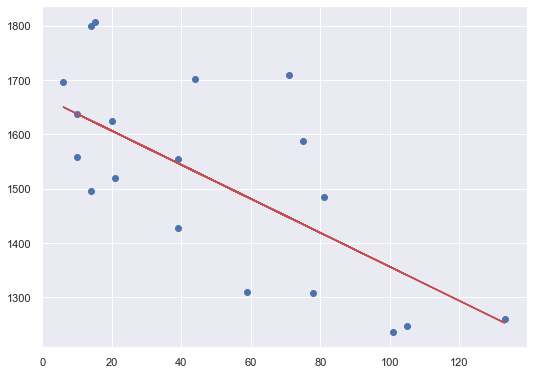

In [338]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [339]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [341]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [342]:
X_const.shape

(42, 2)

In [343]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [344]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           7.83e-06
Time:                        15:19:25   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [345]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.396789010091228


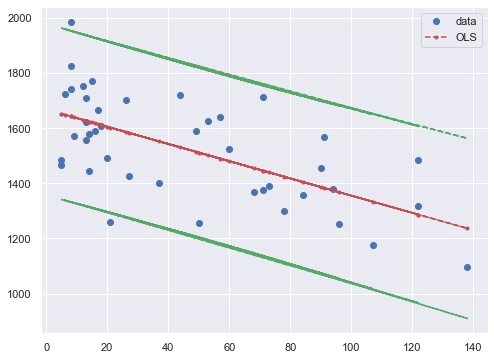

In [346]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

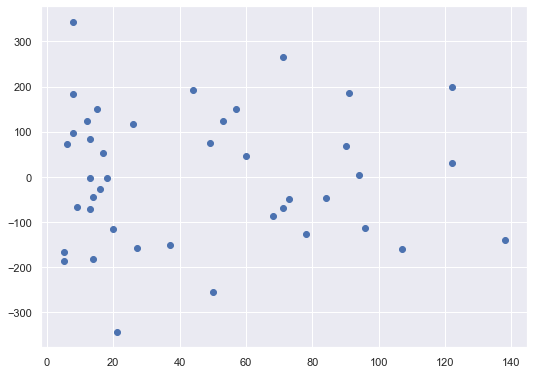

In [347]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

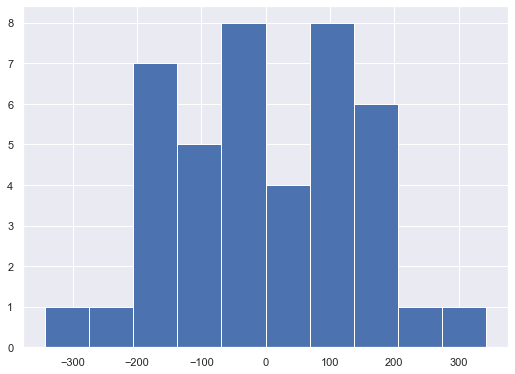

In [348]:
plt.hist(results.resid)

### Выводы:
1. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент)
2. Сильный разброс фактических данных вокруг модели, для небольшого количества данных прогноз работает.
3. Коэффициент детерминации равен 0.50 то есть на 50% жесткость воды обусловлена показателями сметрности.
4. Остатки распределены случайны, взаимосвязь отсутствует, распределение остатков носит вид колокола, что говорит о нормальном распределении.

### Зависимость для северных и южных городов по отдельности

In [349]:
data_north = data.loc[data.location == 'North']
data_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [350]:
data_south = data.loc[data.location == 'South']
data_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


### Север

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

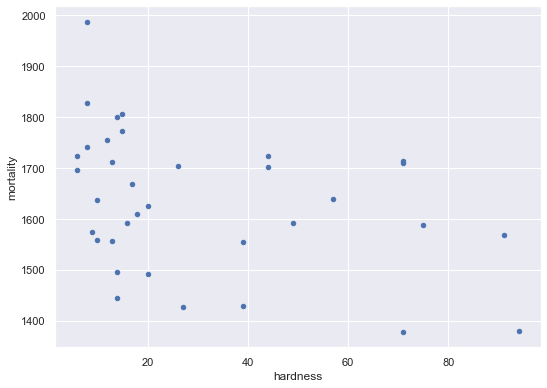

In [351]:
data_north.plot(kind='scatter', x='hardness', y='mortality')

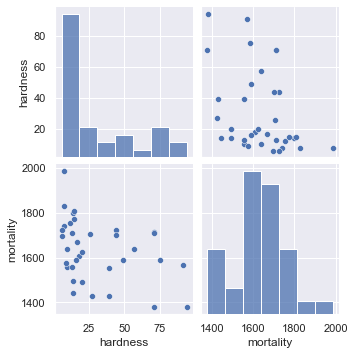

In [352]:
sns.pairplot(data_north[['hardness','mortality']])

In [353]:
# коэффициент корреляции Пирсона

data_north[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [354]:
# коэффициент корреляции Спирмена

data_north[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [355]:
# коэффициент корреляции Кенделла

data_north[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


<AxesSubplot:>

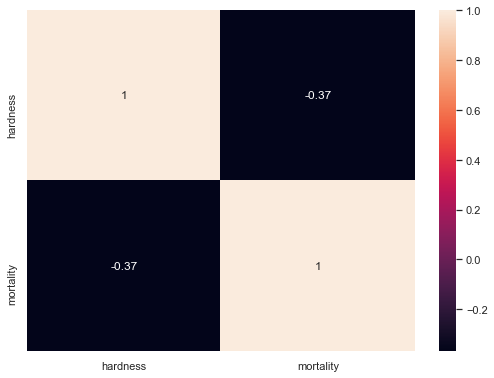

In [356]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_north[['hardness','mortality']].corr(), annot=True)

In [357]:
X_north = data_north[['hardness']]
y_north = data_north['mortality']

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)

In [359]:
X_train.shape

(24, 1)

In [360]:
X_test.shape

(11, 1)

In [361]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [362]:
# коэффициент линейной регрессии

model.coef_

array([-1.97686226])

In [363]:
model.intercept_

1688.150229031281

In [364]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [365]:
# значение коэффициента детерминации

model.score(X_test, y_test) 

0.018885304285745863

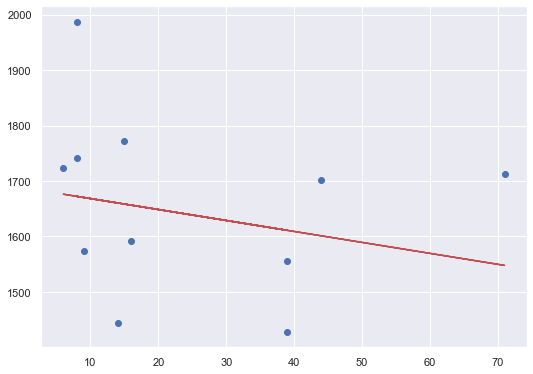

In [366]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)

In [368]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [369]:
X_const.shape

(24, 2)

In [370]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [371]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sun, 13 Dec 2020   Prob (F-statistic):             0.0316
Time:                        15:23:18   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [372]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1688.150229
hardness      -1.976862
dtype: float64
R2:  0.19322282610033525


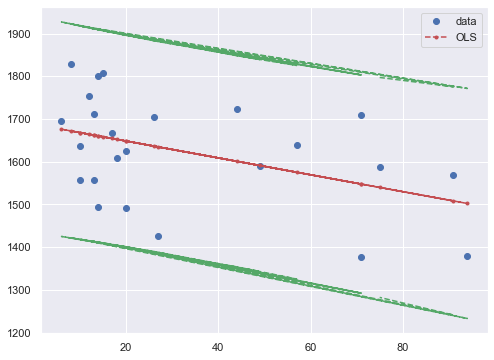

In [373]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

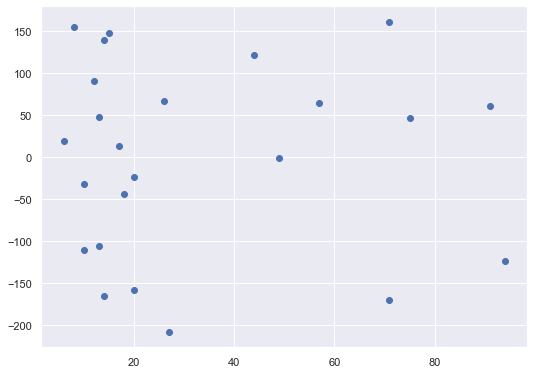

In [374]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <BarContainer object of 10 artists>)

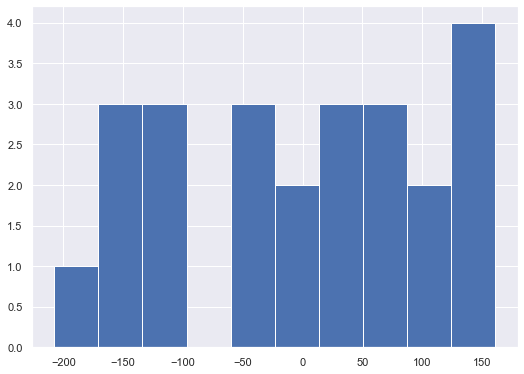

In [375]:
plt.hist(results.resid)

### Юг

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

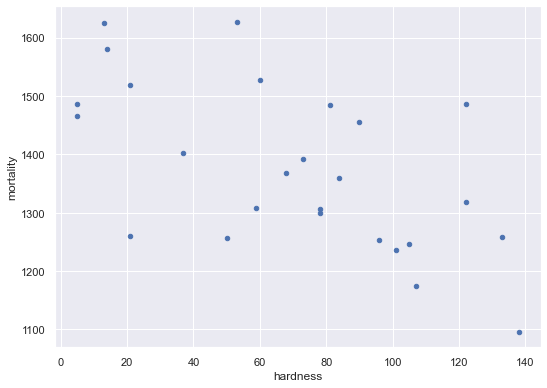

In [376]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

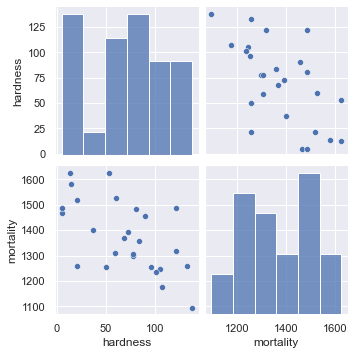

In [377]:
sns.pairplot(data_south[['hardness','mortality']])

In [378]:
# коэффициент корреляции Пирсона

data_south[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [379]:
# коэффициент корреляции Спирмена

data_south[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [380]:
# коэффициент корреляции Кенделла

data_south[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


<AxesSubplot:>

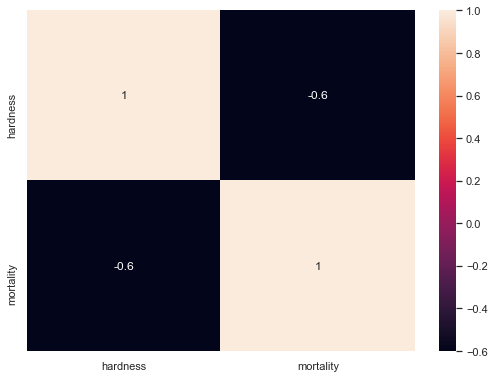

In [381]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_south[['hardness','mortality']].corr(), annot=True)

In [382]:
X_south = data_south[['hardness']]
y_south = data_south['mortality']

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [384]:
X_train.shape

(18, 1)

In [385]:
X_test.shape

(8, 1)

In [386]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [387]:
# коэффициент линейной регрессии

model.coef_

array([-3.51342921])

In [388]:
model.intercept_

1640.2204603423374

In [389]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [390]:
# значение коэффициента детерминации

model.score(X_test, y_test)

-2.5519223012352077

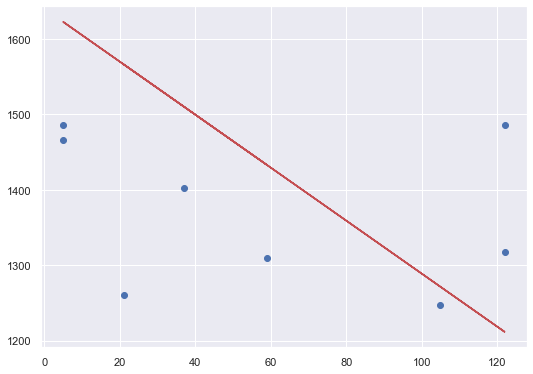

In [391]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [393]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [394]:
X_const.shape

(18, 2)

In [395]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [396]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           7.30e-05
Time:                        15:26:40   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

C:\Users\ivana\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [397]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.6363808308877189


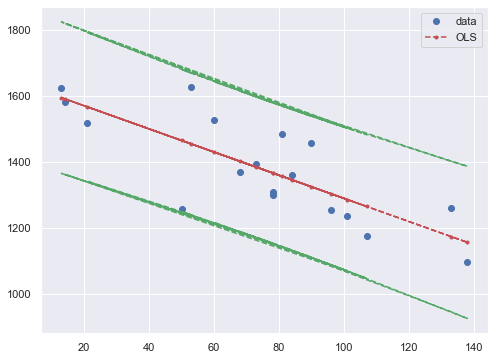

In [398]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

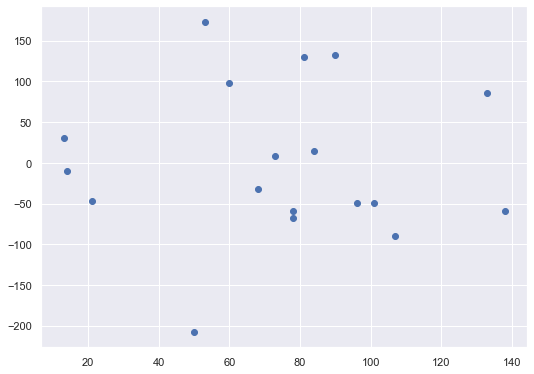

In [399]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

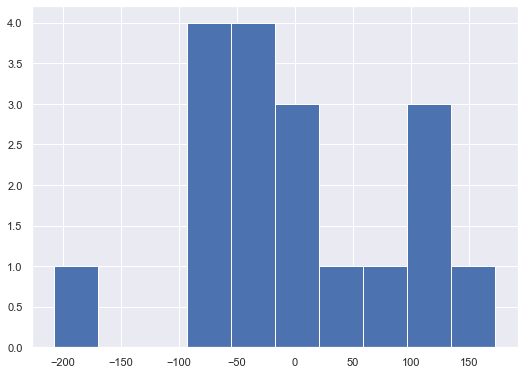

In [400]:
plt.hist(results.resid)

### Выводы:
### По Cеверу
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена слабо по методу Спирмена.
3. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент), регрессия слабая.
4. Сильный разброс фактических данных вокруг модели, для небольшого количества данных прогноз работает.
5. Коэффициент детерминации равен 0.18 то есть на 18% жесткость воды обусловлена показателями сметрности, коэффициент низкий, зависимость слабоя.
6. Остатки распределены случайны, распределение остатков носит вид половины колокола, что говорит о ненормальном распределении.

### По Югу:
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена умеренно сильная по методу Спирмена.
3. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент), регрессия слабая.
4. Средний разброс фактических данных вокруг модели, для пловины количества данных прогноз работает.
5. Коэффициент детерминации равен 0.63 то есть на 63% жесткость воды обусловлена показателями сметрности, коэффициент средний, зависимость заметная.
5. Остатки распределены случайны, взаимосвязь отсутствует, распределение остатков носит вид колокола, что говорит о нормальном распределении.


### Зависимость для городов по отдельности не сохраняется, зависимость городов Юга похожа на общую, зависимость городов Севера отличается от общей.

## Логистическая регрессия и дискриминационный анализ

### Задание 5

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

### Решение

In [401]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [402]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

### Данные

In [403]:
iris = load_iris()

In [404]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [405]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [406]:
data[['sepal length (cm)', 'sepal width (cm)']].head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [407]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [408]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['sepal length (cm)', 'sepal width (cm)']], variety, test_size=0.25)

### LDA-модель

In [410]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [411]:
lda = LinearDiscriminantAnalysis()

In [412]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [413]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [414]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [415]:
result

,0,1
0,2,1
1,2,2
2,2,1
3,0,0
4,2,2
5,2,1
6,1,1
7,1,2
8,0,0
9,1,1


In [416]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [417]:
accuracy_score(y_test, lda.predict(X_test))

0.6578947368421053

In [418]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.50339346,  7.19135302],
       [ 1.47654941, -3.7956452 ],
       [ 4.61902699, -3.89507662]])

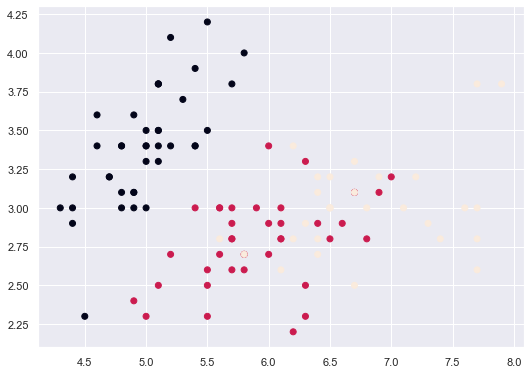

In [419]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [420]:
lda.means_

array([[4.98717949, 3.4       ],
       [5.94358974, 2.78974359],
       [6.73235294, 3.01176471]])

<ipython-input-421-8f8883ecc865>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


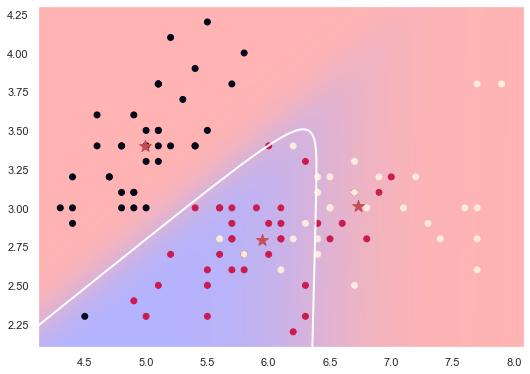

In [421]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [422]:
# какая будет точность?
accuracy_score(y_test, lda.predict(X_test))

0.6578947368421053

### Логистическая модель

In [424]:
# заменим модель на логистическую регресиию

from sklearn.linear_model import LogisticRegression

In [425]:
lr = LogisticRegression()

In [426]:
lr.fit(X_train, y_train)

LogisticRegression()

In [427]:
lr.predict(X_train)

array([1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1,
       2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0,
       2, 0])

In [428]:
accuracy_score(y_test, lr.predict(X_test))

0.6578947368421053

In [429]:
lr.coef_

array([[-2.60810095,  1.9781808 ],
       [ 0.44289981, -1.64122436],
       [ 2.16520113, -0.33695643]])

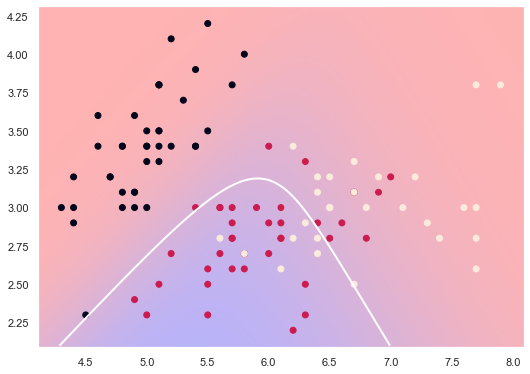

In [430]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

### Кластеризация

In [431]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [432]:
scaler = StandardScaler()

In [433]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data[['sepal length (cm)', 'sepal width (cm)']])

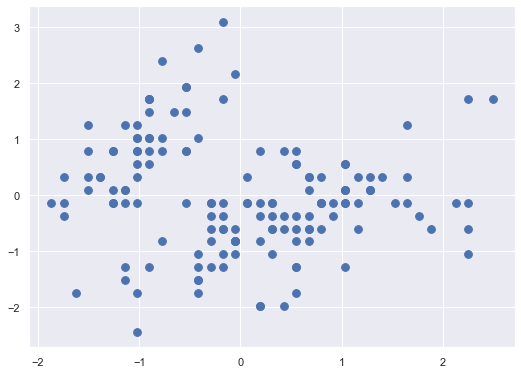

In [434]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [435]:
from sklearn.cluster import KMeans

In [436]:
# явно указываем количество кластеров 
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

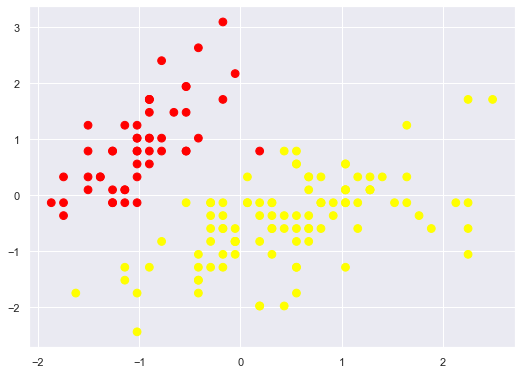

In [437]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [438]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

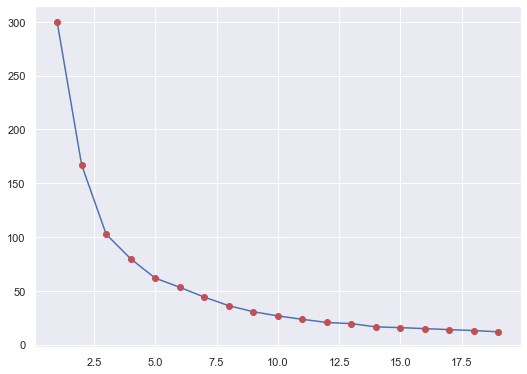

In [440]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [441]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

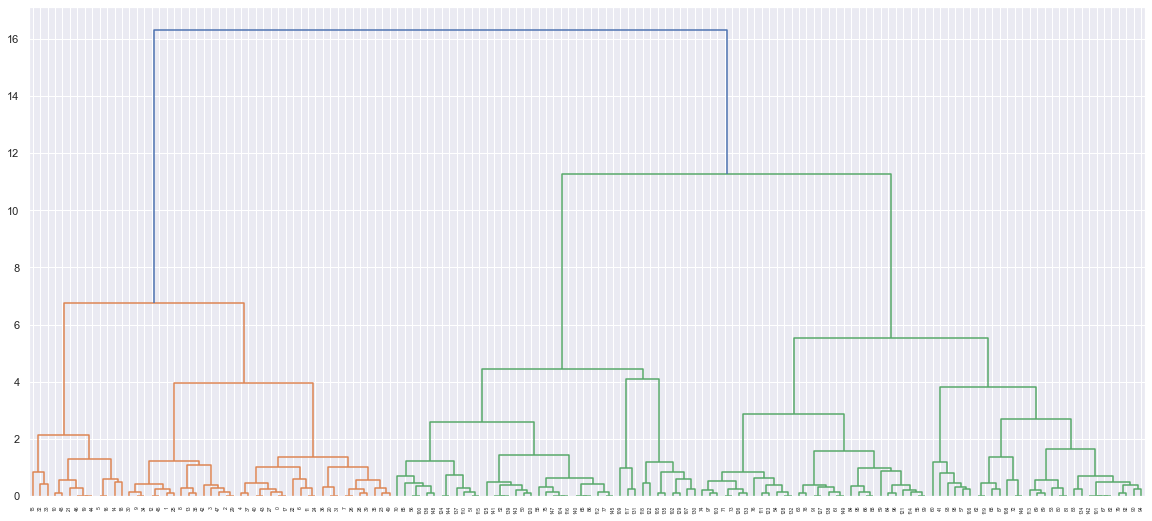

In [442]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [443]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [444]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

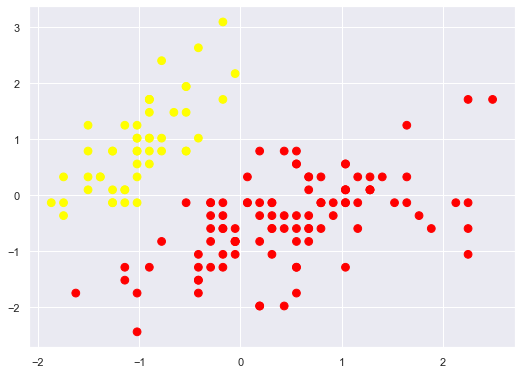

In [445]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

### Оптимальное число кластеров - два.

## Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок

### Задание 6
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

### Решение

In [2]:
from math import sqrt

betta = 0.95 # уровень доверия
D = 225 # дисперссия 
sigma = sqrt(D) # Стандартное отклонение
e = 3 #% #Погрешность

N = ((sigma*betta)/e)**2
print('Минимально необходимый объем выборки:', N)

Минимально необходимый объем выборки: 22.5625


### Задание 7
Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

### Решение

In [6]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc = 19, scale = 171, size = 11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc = 16, scale = 165, size = 12000)  # Выборка женщин со средним ростом 165

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

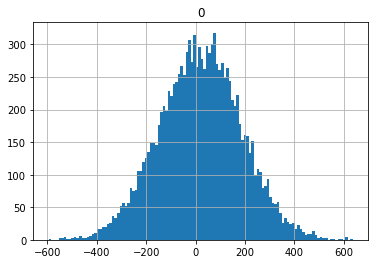

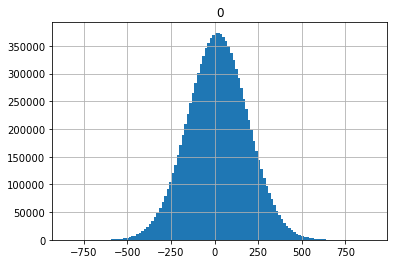

In [9]:
np.random.seed(12)
pd.DataFrame(population_women).hist(bins=120)

population_general=np.concatenate((population_men, population_women))
population_general.mean()
pd.DataFrame(population_general).hist(bins=120)

In [11]:
print(stats.ttest_ind(a=population_men,b=population_women,equal_var=False))

print('Значение 0,0406 говорит о том, что существует вероятность 4,06% того, что выборочные данные для двух идентичных групп сильно различаются. Это больше, чем уровень значимости 0,1%.')

Ttest_indResult(statistic=-0.400994088069208, pvalue=0.6884316001951589)
Значение 0,0406 говорит о том, что существует вероятность 4,06% того, что выборочные данные для двух идентичных групп сильно различаются. Это больше, чем уровень значимости 0,1%.


### Задание 8
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

### Решение

In [12]:
Z = 1.96 #95% # Квантиль нормального распределения
sigma = 150 # Стандартное отклонение
e = 50 #% #Погрешность

N = ((sigma*Z)/e)**2
print('Минимально необходимый объем выборки:', N)

Минимально необходимый объем выборки: 34.5744


### Задание 9
Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

### Решение

In [14]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [16]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)
pvalue

0.828664440194697

In [17]:
from scipy.stats import chi2_contingency

print(np.array(observations))
stat, p, dof, expected = chi2_contingency(observations)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    

[[14 36]
 [15 45]]
stat=0.019, p=0.890
Probably independent


### Вывод:
Под нулевой гипотезой подразумевается, что эффект случайный. Исходя из полученного значения pvalue, мы видим что оно больше заданного уровня значимости, что не дает нам уверенности в том, чтоб отклонить нулевую гипотизу,
Тем самым мы можем согласиться с тем, что предсказание погоды носит случайный характер.

### Задание 10
Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез

### Решение

In [26]:
import scipy.stats as stats

data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


general_data=np.concatenate((data_1,data_2))
t, p = stats.ttest_1samp(a=pd.DataFrame(data_1),popmean=general_data.mean())
t, p

(array([5.89071339]), array([1.19398355e-06]))

In [27]:
general_data=np.concatenate((data_1,data_2))
t, p = stats.ttest_1samp(a=pd.DataFrame(data_2),popmean=general_data.mean())
t, p

(array([-3.94581064]), array([0.00015528]))

In [28]:
t, p = stats.ttest_1samp(a=pd.DataFrame(data_1),popmean=pd.DataFrame(data_2).mean())
t, p

(0    8.107649
 dtype: float64,
 array([1.87198119e-09]))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

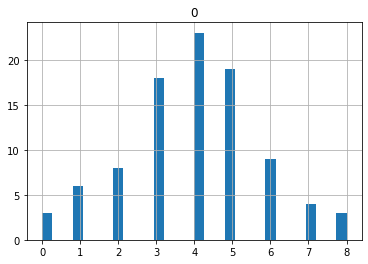

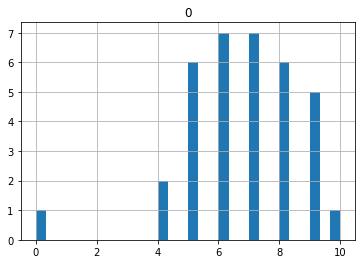

In [29]:
# выборки пренадлежат одному множеству
pd.DataFrame(data_2).hist(bins=30)
pd.DataFrame(data_1).hist(bins=30)

In [30]:
print('Среднее первой выборки:', pd.DataFrame(data_1).mean()[0])
print('Среднее второй выборки:', pd.DataFrame(data_2).mean()[0])
print('Среднее общей выборки:', general_data.mean())

Среднее первой выборки: 6.628571428571429
Среднее второй выборки: 3.967741935483871
Среднее общей выборки: 4.6953125


### Вывод:
Слишком большое значение p-value, мы не можем отклонить нулевую гипотезу, из графиков можем сделать вывод что выборки действительно принадлежат одному множеству

### Задание 11
Мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.
Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

### Ответ

Мы отвергаем нулевую гипотезу.


### Задание 12
Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

### Решение

In [32]:
import scipy.stats as stats
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

weight_df=pd.DataFrame({"weight_before":A,
                         "weight_after":B,
                         "weight_change":A-B})
weight_df.describe()

,weight_before,weight_after,weight_change
count,300.000000,300.000000,300.000000
mean,9.988743,8.652565,1.336178
std,48.382837,50.194664,10.080429
min,-122.665928,-126.456709,-22.958613
25%,-23.848281,-26.014095,-4.807689
50%,9.084926,8.311319,1.310908
75%,43.165156,46.276959,7.309219
max,120.092816,124.331766,35.852828


In [33]:
#только 2% шансов найти различия между препаратами

stats.ttest_rel(a=A,b=B)


Ttest_relResult(statistic=2.2958629051199755, pvalue=0.02237550043463252)

### Ответ
а) Есть только 2% шансов найти различия между препаратами.
б) При значении pvalue менее 0.02237 

## Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить